## Introduction and Definitions
Inheritance was invented in 1969 for Simula. Python not only supports inheritance but multiple inheritance as well. Generally speaking, inheritance is the mechanism of deriving new classes from existing ones. By doing this, we get a hierarchy of classes. In most class-based object-oriented languages, an object created through inheritance (a "child object") acquires all, - though there are exceptions in some programming languages, - of the properties and behaviors of the parent object.

Inheritance allows programmers to create classes that are built upon existing classes, and this enables a class created through inheritance to inherit the attributes and methods of the parent class. This means that inheritance supports code reusability. The methods or generally speaking the software inherited by a subclass is considered to be reused in the subclass. The relationships of objects or classes through inheritance give rise to a directed graph.

The class from which a class inherits is called the parent or superclass. A class which inherits from a superclass is called a subclass, also called heir class or child class. Superclasses are sometimes called ancestors as well. There exists a hierarchical relationship between classes. It's similar to relationships or categorizations that we know from real life. Think about vehicles, for example. Bikes, cars, buses and trucks are vehicles. Pick-ups, vans, sports cars, convertibles and estate cars are all cars and by being cars they are vehicles as well. We could implement a vehicle class in Python, which might have methods like accelerate and brake. Cars, Buses and Trucks and Bikes can be implemented as subclasses which will inherit these methods from vehicle.

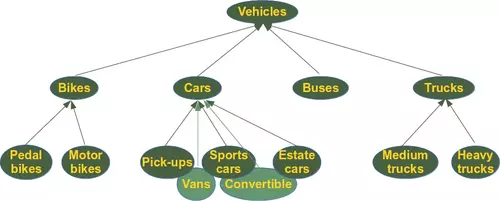

## Syntax of Inheritance in Python
The syntax for a subclass definition looks like this:
```
class DerivedClassName(BaseClassName):
    pass
```
Instead of the ```pass``` statement, there will be methods and attributes like in all other classes. The name BaseClassName must be defined in a scope containing the derived class definition.

Now we are ready for a simple inheritance example with Python code.

## Simple Inheritance Example
We will define a class ```PhysicianRobot```, which inherits from ```Robot```.

In [1]:
class Robot:
    def __init__(self, name):
        self.name = name
    def say_hi(self):
        print("Hi, I am " + self.name)
class PhysicianRobot(Robot):
    pass
x = Robot("Marvin")
y = PhysicianRobot("James")
print(x, type(x))
print(y, type(y))
y.say_hi()

<__main__.Robot object at 0x00000259B5B07860> <class '__main__.Robot'>
<__main__.PhysicianRobot object at 0x00000259B5B07828> <class '__main__.PhysicianRobot'>
Hi, I am James


If you look at the code of our ```PhysicianRobot``` class, you can see that we haven't defined any attributes or methods in this class. As the class ```PhysicianRobot``` is a subclass of ```Robot```, it inherits, in this case, both the method ```__init__``` and ```say_hi```. Inheriting these methods means that we can use them as if they were defined in the ```PhysicianRobot``` class. When we create an instance of ```PhysicianRobot```, the ```__init__``` function will also create a name attribute. We can apply the ```say_hi``` method to the ```PhysisicianRobot``` object y, as we can see in the output from the code above.

## Difference between type and isinstance
People frequently ask where the difference between checking the type via the ```type``` function or the function ```isinstance``` is. The difference can be seen in the following code. We see that ```isinstance``` returns ```True``` if we compare an object either with the class it belongs to or with the superclass. However the equality operator only returns ```True``` if we compare an object with its own class.

In [2]:
x = Robot("Marvin")
y = PhysicianRobot("James")
print(isinstance(x, Robot), isinstance(y, Robot))
print(isinstance(x, PhysicianRobot))
print(isinstance(y, PhysicianRobot))
print(type(y) == Robot, type(y) == PhysicianRobot)

True True
False
True
False True


In [3]:
# This is even true for arbitrary ancestors of the class in the inheritance line
class A:
    pass
class B(A):
    pass
class C(B):
    pass
x = C()
print(isinstance(x, A))

True


Now it should be clear, why PEP 8 (https://legacy.python.org/dev/peps/pep-0008/#programming-recommendations), the official Style Guide for Python code, says: "Object type comparisons should always use isinstance() instead of comparing types directly."

## Overriding
Let us get back to our new ```PhysicianRobot``` class. Imagine now that an instance of a ```PhysicianRobot``` should say hi in a different way. In this case, we have to redefine the method ```say_hi``` inside of the subclass ```PhysicianRobot```:

In [4]:
class Robot:
    def __init__(self, name):
        self.name = name
    def say_hi(self):
        print("Hi, I am " + self.name)
class PhysicianRobot(Robot):
    def say_hi(self):
        print("Everything will be okay! ") 
        print(self.name + " takes care of you!")
y = PhysicianRobot("James")
y.say_hi()

Everything will be okay! 
James takes care of you!


What we have done in the previous example is called **overriding**. A method of a parent class gets overridden by simply defining a method with the same name in the child class.

If a method is overridden in a class, the original method can still be accessed, but we have to do it by calling the method directly with the class name, i.e. ```Robot.say_hi(y)```. We demonstrate this in the following code:

In [5]:
y = PhysicianRobot("Doc James")
y.say_hi()
print("... and now the 'traditional' robot way of saying hi :-)")
Robot.say_hi(y)

Everything will be okay! 
Doc James takes care of you!
... and now the 'traditional' robot way of saying hi :-)
Hi, I am Doc James


We have seen that an inherited class can inherit and override methods from the superclass. Besides this a subclass often needs additional methods with additional functionalities, which do not exist in the superclass. An instance of the ```PhysicianRobot``` class will need for example the method ```heal``` so that the physician can do a proper job. We will also add an attribute ```health_level``` to the ```Robot``` class, which can take a value between 0 and 1. The robots will 'come to life' with a random value between 0 and 1. If the ```health_level``` of a ```Robot``` is below 0.8, it will need a doctor. We write a method ```needs_a_doctor``` which returns True if the value is below 0.8 and False otherwise. The 'healing' in the ```heal``` method is done by setting the ```health_level``` to a random value between the old ```health_level``` and 1. This value is calculated by the uniform function of the random module.

In [6]:
import random
class Robot:
    def __init__(self, name):
        self.name = name
        self.health_level = random.random() 
    def say_hi(self):
        print("Hi, I am " + self.name)
    def needs_a_doctor(self):
        if self.health_level < 0.8:
            return True
        else:
            return False
class PhysicianRobot(Robot):
    def say_hi(self):
        print("Everything will be okay! ") 
        print(self.name + " takes care of you!")
    def heal(self, robo):
        robo.health_level = random.uniform(robo.health_level, 1)
        print(robo.name + " has been healed by " + self.name + "!")
doc = PhysicianRobot("Dr. Frankenstein")        
rob_list = []
for i in range(5):
    x = Robot("Marvin" + str(i))
    if x.needs_a_doctor():
        print("health_level of " + x.name + " before healing: ", x.health_level)
        doc.heal(x)
        print("health_level of " + x.name + " after healing: ", x.health_level)
    rob_list.append((x.name, x.health_level))
print(rob_list)

health_level of Marvin1 before healing:  0.31988417742410413
Marvin1 has been healed by Dr. Frankenstein!
health_level of Marvin1 after healing:  0.36321405425232306
health_level of Marvin3 before healing:  0.3448149226750703
Marvin3 has been healed by Dr. Frankenstein!
health_level of Marvin3 after healing:  0.860516394995524
health_level of Marvin4 before healing:  0.3812935442097567
Marvin4 has been healed by Dr. Frankenstein!
health_level of Marvin4 after healing:  0.7026687747178734
[('Marvin0', 0.9476745964404725), ('Marvin1', 0.36321405425232306), ('Marvin2', 0.9227687499126013), ('Marvin3', 0.860516394995524), ('Marvin4', 0.7026687747178734)]


When we override a method, we sometimes want to reuse the method of the parent class and at some new stuff. To demonstrate this, we will write a new version of the ```PhysicianRobot```. ```say_hi``` should return the text from the ```Robot``` class version plus the text " and I am a physician!"

In [7]:
class PhysicianRobot(Robot):
    def say_hi(self):
        Robot.say_hi(self)
        print("and I am a physician!")
doc = PhysicianRobot("Dr. Frankenstein")      
doc.say_hi()

Hi, I am Dr. Frankenstein
and I am a physician!


We don't want to write redundant code and therefore we called ```Robot.say_hi(self)```. We could also use the super function:

In [8]:
class PhysicianRobot(Robot):
    def say_hi(self):
        super().say_hi()
        print("and I am a physician!")
doc = PhysicianRobot("Dr. Frankenstein")      
doc.say_hi()

Hi, I am Dr. Frankenstein
and I am a physician!


```super``` is not really necessary in this case. One could argue that it makes the code more maintainable, because we could change the name of the parent class, but this is seldom done anyway in existing classes. The real benefit of ```super``` shows when we use it with multiple inheritance.

## Distinction between Overwriting, Overloading and Overriding
### Overwriting
If we overwrite a function, the original function will be gone. The function will be redefined. This process has nothing to do with object orientation or inheritance.

In [9]:
def f(x):
    return x + 42
print(f(3))
# f will be overwritten (or redefined) in the following:
def f(x):
    return x + 43
print(f(3))

45
46


### Overloading
This subchapter will be only interesting for C++ and Java programmers who want to know how overloading can be accomplished in Python. Those who do not know about overloading will not miss it!

In the context of object-oriented programming, you might have heard about "overloading" as well even though "overloading" is not directly connected to OOP. **Overloading is the ability to define a function with the same name multiple times**. The definitions are different concerning the number of parameters and types of the parameters. It's the ability of one function to perform different tasks, depending on the number of parameters or the types of the parameters. We cannot overload functions like this in Python, but it is not necessary either.

This course is, however, not about C++ and we have so far avoided using any C++ code. We want to make an exception now, so that you can see how overloading works in C++.
```
#include 
#include 
using namespace std;
int successor(int number) {
    return number + 1;
}
double successor(double number) {
    return number + 1;
}
int main() {
    cout << successor(10) << endl;
    cout << successor(10.3) << endl;
    return 0;
}
```
We defined the successor function twice: One time for int and the other time with float as a Parameter. In Python the function can be defined like this, as you will know for sure:
```
def successor(x):
    return x + 1
```
As x is only a reference to an object, the Python function successor can be called with every object, even though it will create exceptions with many types. But it will work with int and float values!

Having a function with a different number of parameters is another way of function overloading. The following C++ program shows such an example. The function f can be called with either one or two integer arguments:
```
 #include 
using namespace std;
int f(int n);
int f(int n, int m);
int main() {
    cout << "f(3): " << f(3) << endl;
    cout << "f(3, 4): " << f(3, 4) << endl;
    return 0;
}
int f(int n) {
    return n + 42;
}
int f(int n, int m) {
    return n + m + 42; 
}
```
This doesn't work in Python, as we can see in the following example. The second definition of f with two parameters redefines or overrides the first definition with one argument. Overriding means that the first definition is not available anymore.

In [10]:
def f(n):
    return n + 42
def f(n,m):
    return n + m + 42
print(f(3, 4))

49


In [11]:
# If you call f with only one parameter, you will raise an exception:
print(f(3))

TypeError: f() missing 1 required positional argument: 'm'

Yet, it is possible to simulate the overloading behaviour of C++ in Python in this case with a default parameter:

In [12]:
def f(n, m=None):
    if m:
        return n + m +42
    else:
        return n + 42
print(f(3)) 
print(f(1, 3))

45
46


The * operator can be used as a more general approach for a family of functions with 1, 2, 3, or even more parameters:

In [13]:
def f(*x):
    if len(x) == 1:
        return x[0] + 42
    elif len(x) == 2:
        return x[0] - x[1] + 5
    else:
        return 2 * x[0] + x[1] + 42
print(f(3))
print(f(1, 2))
print(f(3, 2, 1))

45
4
50


### Overriding
Overriding is already explained above!